# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/tomaslui/healthcare-dataset

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create the dataframes for all the 9 Files
# DimCptCode
# DimDate
# DimDiagnosisCode
# DimLocation
# DimPatient
# DimPhysician
# DimPayer
# DimTransaction
# FactTable
#read in dataset
df_fact = pd.read_csv('dataset/csv/FactTable.csv')
df_location = pd.read_csv('dataset/csv/DimLocation.csv')
df_patient = pd.read_csv('dataset/csv/DimPatient.csv')
df_physician = pd.read_csv('dataset/csv/DimPhysician.csv')
df_date = pd.read_csv('dataset/csv/DimDate.csv')

df = pd.merge(pd.merge(pd.merge(pd.merge(df_fact, df_location, on='dimLocationPK'), df_patient, on='dimPatientPK', suffixes=('', '_drop')), df_physician, on='dimPhysicianPK'), df_date, on='dimDateServicePK')
              
df.drop(['PatientNumber_drop'], axis=1, inplace=True)
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50516 entries, 0 to 50515
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FactTablePK         50516 non-null  int64  
 1   dimPatientPK        50516 non-null  int64  
 2   dimPhysicianPK      50516 non-null  int64  
 3   dimDateServicePK    50516 non-null  int64  
 4   dimDatePostPK       50516 non-null  int64  
 5   dimCPTCodePK        50516 non-null  int64  
 6   dimPayerPK          50516 non-null  int64  
 7   dimTransactionPK    50516 non-null  int64  
 8   dimLocationPK       50516 non-null  int64  
 9   PatientNumber       50516 non-null  int64  
 10  dimDiagnosisCodePK  50516 non-null  int64  
 11  CPTUnits            50516 non-null  int64  
 12  GrossCharge         50516 non-null  float64
 13  LocationName        50516 non-null  object 
 14  FirstName           50516 non-null  object 
 15  LastName            50516 non-null  object 
 16  Emai

,FactTablePK,dimPatientPK,dimPhysicianPK,dimDateServicePK,dimDatePostPK,dimCPTCodePK,dimPayerPK,dimTransactionPK,dimLocationPK,PatientNumber,...,ProviderName,ProviderSpecialty,ProviderFTE,Date,Year,Month,MonthPeriod,MonthYear,Day,DayName
0,1082164042,6066415,216412,20200528,20191215,583482,58987,49468,785522,21384136,...,Dr. Hendricks,Physical Medicine & Rehabilitation,0.00,5/28/2020,2020,May,202005,May 2020,28,Thursday
1,1027823678,5810482,216111,20200501,20191215,581655,98735,50858,786431,21387258,...,Dr. Leonard,Thoracic Surgery (Cardiothoracic Vascular Surg...,0.90,5/1/2020,2020,May,202005,May 2020,1,Friday
2,922963624,5337135,215646,20200102,20191215,596355,92873,53713,786027,21381441,...,Dr. Lam,Internal Medicine,0.87,1/2/2020,2020,January,202001,January 2020,2,Thursday
3,923120306,5337135,215646,20200102,20191215,596355,58987,53713,786027,21381441,...,Dr. Lam,Internal Medicine,0.87,1/2/2020,2020,January,202001,January 2020,2,Thursday
4,951760836,5337135,215646,20200205,20191215,596355,98735,53713,786027,21381441,...,Dr. Lam,Internal Medicine,0.87,2/5/2020,2020,February,202002,February 2020,5,Wednesday


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [223]:
# summary statistics
print(df.drop(['FactTablePK', 'dimPatientPK', 'dimPhysicianPK', 'dimDatePostPK', 'dimDateServicePK', 'dimCPTCodePK', 'dimPayerPK', 'dimTransactionPK', 'dimLocationPK','PatientNumber', 'ProviderNpi', 'dimDiagnosisCodePK','Year','MonthPeriod','Day'], axis=1).describe())
print("***********************")

# Create a new dataframe contains the Location & Patients visited the location
df_location_patients = df[['LocationName','PatientNumber']]
dfg_location_patients = df_location_patients.groupby('LocationName')['PatientNumber'].nunique().reset_index()
dfg_location_patients = dfg_location_patients.rename(columns={'PatientNumber': 'Patient Count'})
print(dfg_location_patients.info())
print(dfg_location_patients)
print("***********************")

# Create a new dataframe which contains the Location & Physicians working on the location
df_location_physicians = df[['LocationName' , 'ProviderNpi']]
dfg_location_physicians = df_location_physicians.groupby('LocationName')['ProviderNpi'].nunique().reset_index()
dfg_location_physicians = dfg_location_physicians.rename(columns={'ProviderNpi': 'Physician Count'})
print(dfg_location_physicians.info())
print(dfg_location_physicians)
print("***********************")

# Create a new dataframe which contains the Provider Speciality & unique Patients visited the Speciality 
df_providersp_patients = df[['ProviderSpecialty','PatientNumber']]
dfg_providersp_patients = df_providersp_patients.groupby('ProviderSpecialty')['PatientNumber'].nunique().reset_index()
#dfg_providersp_patients = df_providersp_patients.rename(columns={'PatientNumber': 'Patient Count'})
print(dfg_providersp_patients.info())
print(dfg_providersp_patients)
print("***********************")

# Create a new dataframe which contains the date of visit & unique patients visit on that day
df_patients_visit = df[['Date','PatientNumber']]
dfg_patients_visit = df_patients_visit.groupby('Date')['PatientNumber'].size().reset_index(name='PatientNumber')
dfg_patients_visit['Date'] = pd.to_datetime(dfg_patients_visit['Date'])
dfg_patients_visit = dfg_patients_visit.rename(columns={'PatientNumber': 'Patient Count'}).sort_values(by='Date', ascending=True)
print(dfg_patients_visit.info())
print(dfg_patients_visit)




           CPTUnits   GrossCharge    PatientAge   ProviderFTE
count  50516.000000  50516.000000  50516.000000  50516.000000
mean       1.442533    168.858021     44.541432      0.799212
std        6.367551    157.815359     26.288297      0.249067
min     -600.000000  -6600.000000      0.000000      0.000000
25%        1.000000     99.000000     21.000000      0.670000
50%        1.000000    162.000000     45.000000      0.900000
75%        2.000000    232.000000     68.000000      1.000000
max      600.000000   6600.000000     90.000000      1.000000
***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LocationName   11 non-null     object
 1   Patient Count  11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes
None
                     LocationName  Patient Count
0   Angelstone Community Hospital  

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

                     LocationName  Patient Count
0   Angelstone Community Hospital           2093
1    Big Heart Community Hospital           1017
2                Evergreen Clinic            247
3        Fairmont Hospital Center            146
4       Fairview General Hospital            369
5         Genesis Hospital Center              2
6         Guardian Medical Clinic            388
7         Memorial Medical Center             14
8                  Pioneer Clinic             27
9        Principal Medical Clinic            455
10        Twin Mountains Hospital            333


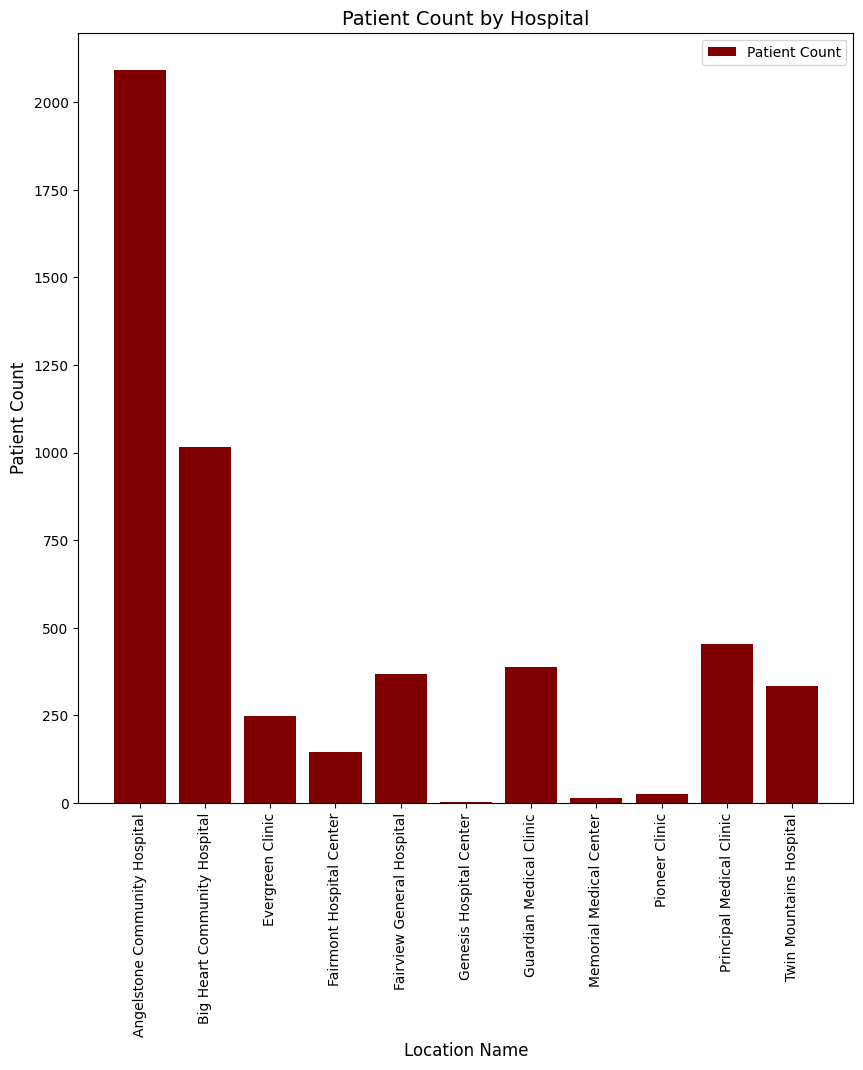

                     LocationName  Physician Count
0   Angelstone Community Hospital              386
1    Big Heart Community Hospital              175
2                Evergreen Clinic              106
3        Fairmont Hospital Center               28
4       Fairview General Hospital               61
5         Genesis Hospital Center                2
6         Guardian Medical Clinic               72
7         Memorial Medical Center                2
8                  Pioneer Clinic                6
9        Principal Medical Clinic               89
10        Twin Mountains Hospital               60


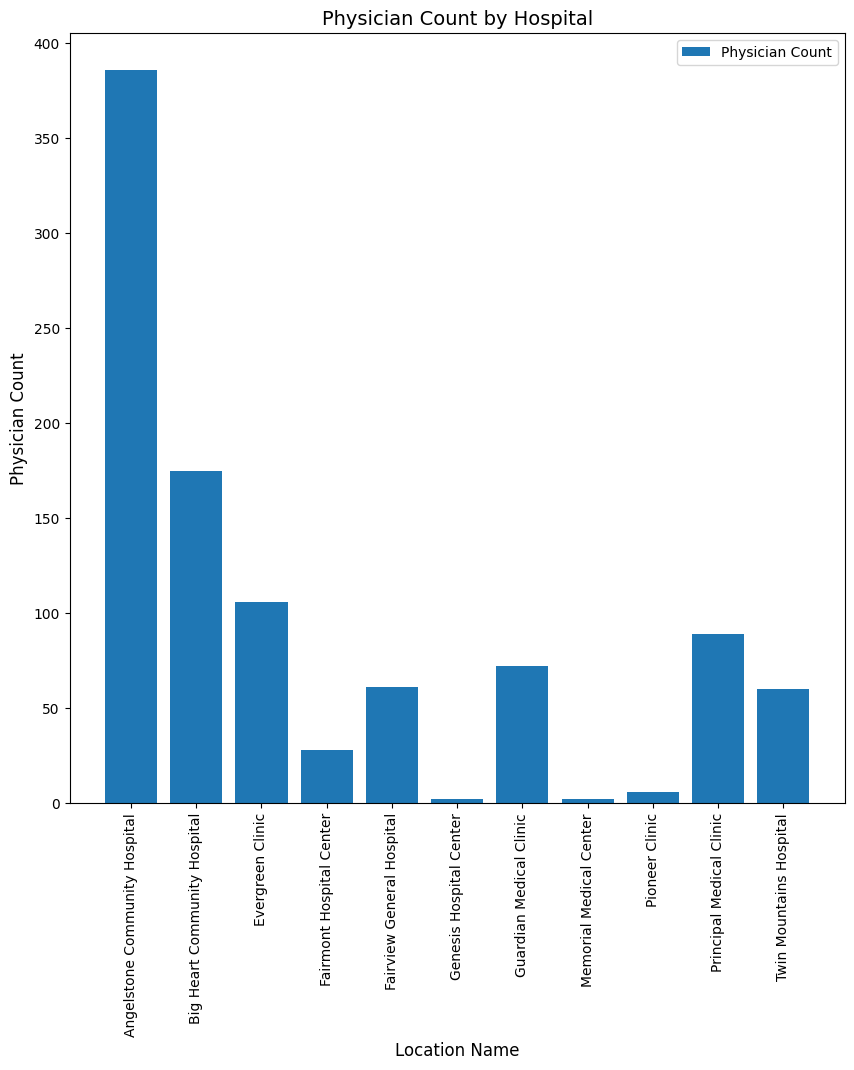

                                    ProviderSpecialty  PatientNumber
0                                      Anesthesiology             14
1                                Behavioral Clinician             18
2                                         Dermatology              1
3                                  Emergency Medicine            320
4                                     Family Medicine            739
5                                         Hospitalist             21
6                                   Internal Medicine           1753
7                                             Midwife              5
8                                Neurological Surgery              7
9                                    Nuclear Medicine             54
10                                 Nurse Practitioner            279
11                            Obstetrics & Gynecology            166
12                                      Ophthalmology             28
13                                

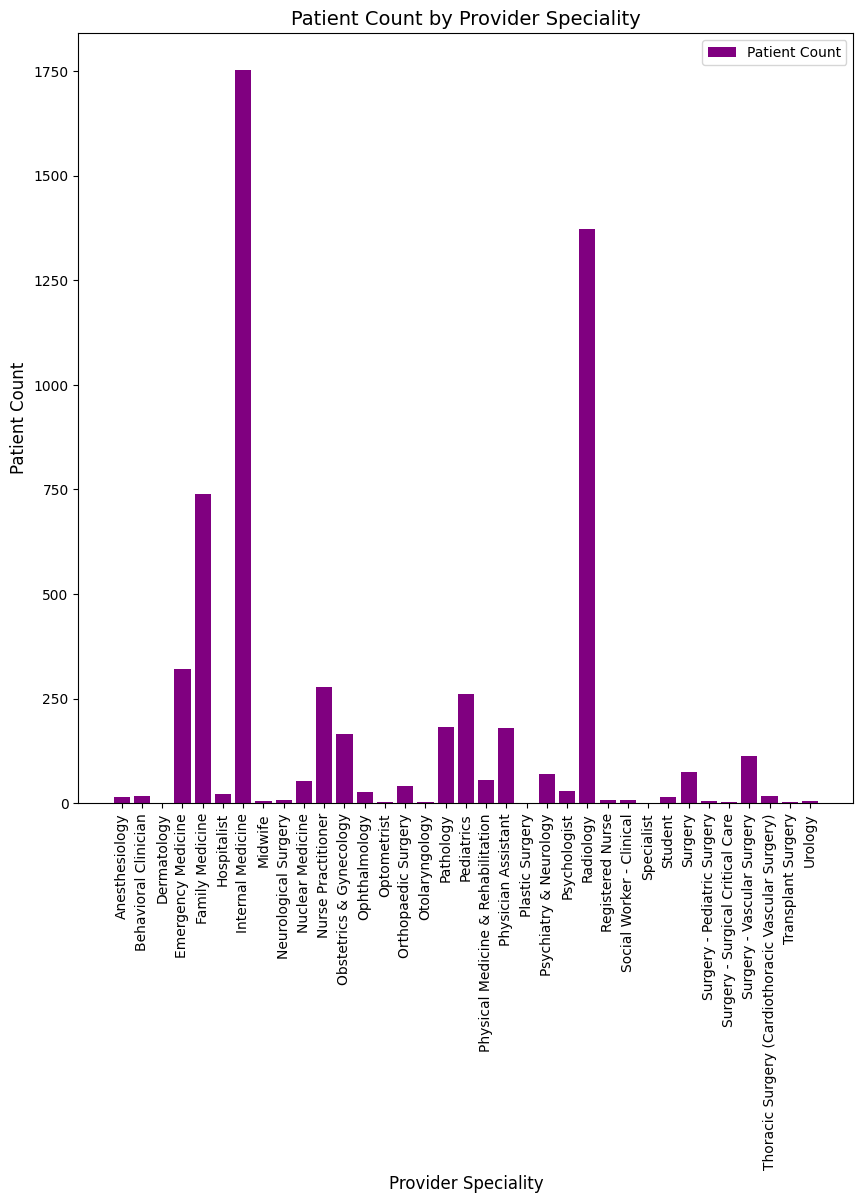

In [224]:
#dataframe which contains the Hospital & unique Patients visited the Hospital 
print(dfg_location_patients)

plt.figure(figsize=(10, 10))
plt.bar(dfg_location_patients['LocationName'], dfg_location_patients['Patient Count'], color='maroon', label='Patient Count')
plt.title('Patient Count by Hospital', fontsize=14)
plt.xlabel('Location Name', fontsize=12)
plt.ylabel('Patient Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.show()

#dataframe which contains the Hospital & Physicians working in the Hospital 
print(dfg_location_physicians)

plt.figure(figsize=(10, 10))
plt.bar(dfg_location_physicians['LocationName'], dfg_location_physicians['Physician Count'], label='Physician Count')
plt.title('Physician Count by Hospital', fontsize=14)
plt.xlabel('Location Name', fontsize=12)
plt.ylabel('Physician Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.show()

#dataframe which contains the Provider Speciality & unique Patients visited the Speciality 
print(dfg_providersp_patients)

plt.figure(figsize=(10, 10))
plt.bar(dfg_providersp_patients['ProviderSpecialty'], dfg_providersp_patients['PatientNumber'], color='purple', label='Patient Count')
plt.title('Patient Count by Provider Speciality', fontsize=14)
plt.xlabel('Provider Speciality', fontsize=12)
plt.ylabel('Patient Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.show()



          Date  Patient Count
31  2019-12-16           1813
32  2019-12-17           2568
33  2019-12-18           2277
34  2019-12-19           3411
35  2019-12-20           2084
..         ...            ...
211 2020-07-22             62
212 2020-07-23             47
213 2020-07-24             14
214 2020-07-25             22
215 2020-07-26             10

[222 rows x 2 columns]


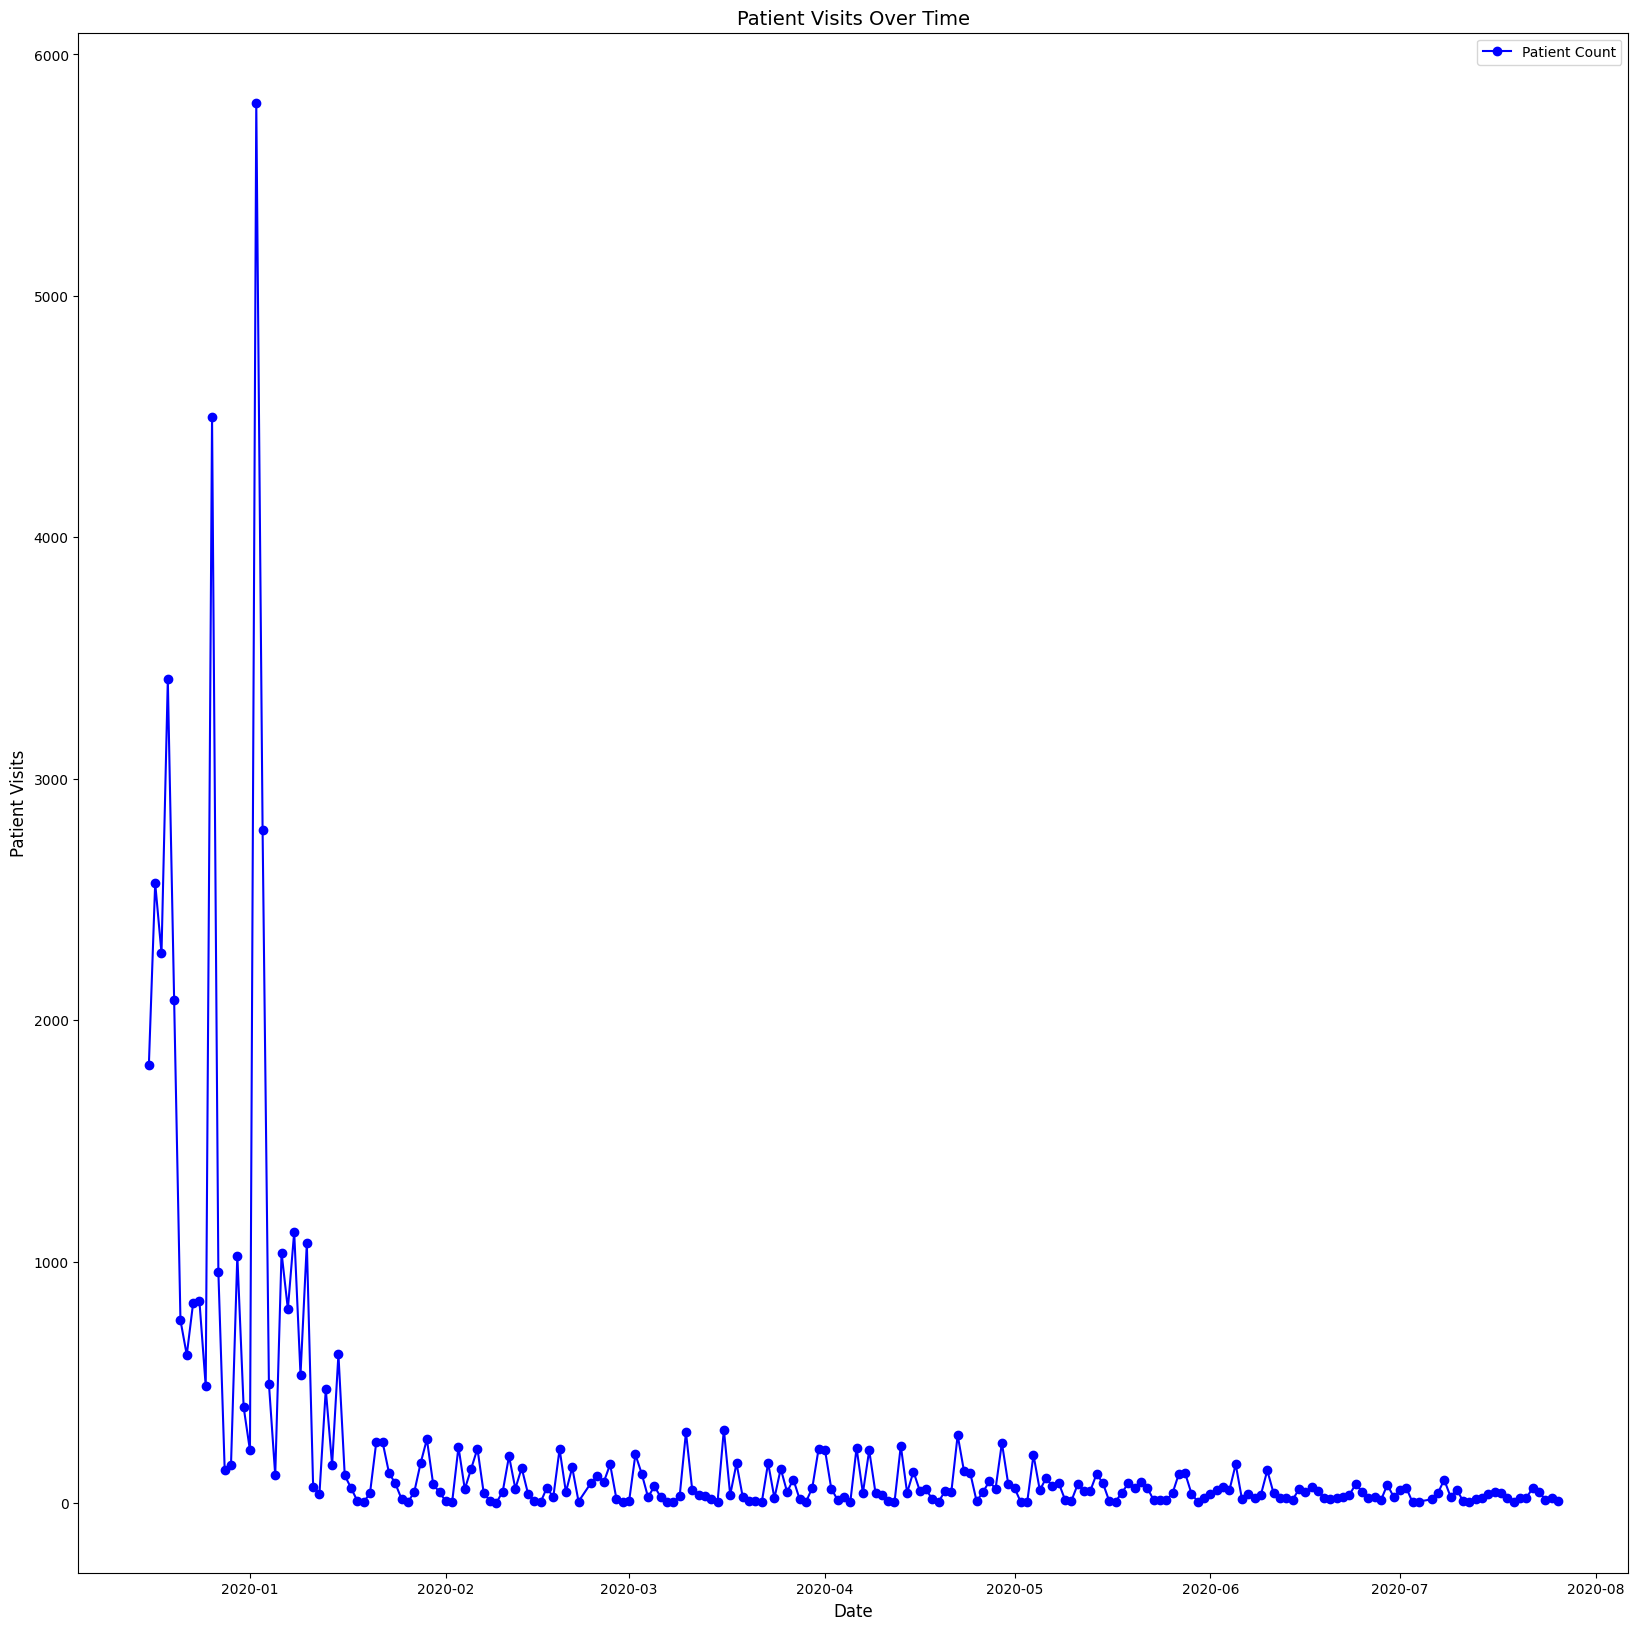

In [225]:
print(dfg_patients_visit)
plt.figure(figsize=(20, 20))
plt.plot(dfg_patients_visit['Date'], dfg_patients_visit['Patient Count'], marker='o', linestyle='-', color='b', label='Patient Count')
plt.title('Patient Visits Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Patient Visits', fontsize=12)
plt.legend()
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?
      Yes.  There are duplicate patient visit entries in the FactTable for a given patient with same procedure and diagnosis.  If there are duplicate entries, the invalid duplicate entries are negated by an equivalent negative CPTUnits and negative GrossCharge to nullify the duplicate entry.

3. Do you have any concerns about your dataset?
    The patient visit entries span over a period of 8 months however majority of the visits happened in the month of Dec 2019 which means that the data is not accurately captured for the remaining 7 months of 2020.

5. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?
    There are a few anomalies in the CPTUnits.  Few of the CPTUnits (CPTUnits = Number of times the procedure is performed) go from 150-600 which seems to be anamoly which needs to be cleanedup.